In [1]:
'''
Import Necessary Packages and Libraries
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from pandas_profiling import ProfileReport
from csv import reader,DictReader

In [2]:
'''
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy
'''
pass

In [3]:
'''
Below are the business questions to be answered

1.) What are the most desired Platforms next year (2020)?
2.) What are the most desired Databases next year (2020)?
3.) What are the most desired Programming Languages next year (2020)?
4.) What are the most desired Web Frameworks next year (2020)?
5.) What are the most used Dev environments currently (2019)?
'''
pass

In [4]:
'''
Defining constants
'''
source_data_file='../data/survey_results_public_2019.csv'
data_profile_report='../reports/data_profile_survey_results_public_2019.csv.html'

data_file='../data/survey_results_public_most_desired_2019.csv'

In [5]:
'''
Read csv and create dataframe

Commenting this code for now due to 100 MB limitaion on Git
However a smaller (Select subset of columns) data set is created
This smaller data set is used later
'''

'''
df_source_2019=pd.read_csv(source_data_file,\
               delimiter=',',\
               header=0,\
               encoding ='utf-8'\
              )
'''
pass

In [6]:
'''
Profile Data

Code is commented as the source data file is removed from git due to 100 MB limitation
This was generated locally
The report is checke into git.
One can download from git 
View in Chrome browser
'''
#profile = ProfileReport(df_source_2019)
#profile.to_file(output_file=data_profile_report)
pass

In [7]:
'''
Create the most relevant data file to answer the businss questions

Respondent
PlatformDesireNextYear
DatabaseDesireNextYear
LanguageDesireNextYear
WebFrameDesireNextYear
DevEnviron

This also allows to check in the data file to git
Allows users to download and run the subsequent code seamlessly
'''

'''
df_source_2019[['Respondent',\
         'PlatformDesireNextYear',\
         'DatabaseDesireNextYear',\
         'LanguageDesireNextYear',\
         'WebFrameDesireNextYear',\
         'DevEnviron'\
        ]].to_csv(data_file,sep=',', encoding='utf-8', index=False)
'''
pass

In [8]:
'''
Read csv and create dataframe
'''
df_2019=pd.read_csv(data_file,\
               delimiter=',',\
               header=0,\
               encoding ='utf-8'\
              )

In [9]:
'''
Explore the data fields

Respondent
PlatformDesireNextYear
DatabaseDesireNextYear
LanguageDesireNextYear
WebFrameDesireNextYear
DevEnviron

'''
df_2019

,Respondent,PlatformDesireNextYear,DatabaseDesireNextYear,LanguageDesireNextYear,WebFrameDesireNextYear,DevEnviron
0,1,Android;Arduino;Windows,MySQL,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,Flask;jQuery,IntelliJ;Notepad++;PyCharm
1,2,Windows,MySQL,C++;HTML/CSS;JavaScript;SQL,Django,Atom;PyCharm
2,3,NaN,PostgreSQL,Elixir;HTML/CSS,Other(s):,Vim;Visual Studio Code
3,4,Linux;Windows,MySQL;SQLite,C;C#;JavaScript;SQL,NaN,Eclipse;Vim;Visual Studio;Visual Studio Code
4,5,Android;Docker;Kubernetes;Linux;Slack,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Flask;jQuery;React.js;Spring,IntelliJ;Notepad++;Vim
...,...,...,...,...,...,...
88878,88377,Google Cloud Platform;Linux,Firebase;MySQL;SQLite,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,jQuery;Vue.js,Atom;Visual Studio;Visual Studio Code
88879,88601,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,NaN,NaN,NaN,NaN


In [10]:
'''
All the relevent fields are strings delimited by ';'
We will need a function to get the occurences of each word
'''
pass

In [11]:
def get_df_desired_x(df,cs,cd):
    """ Get a data
    Args:
    df - data_frame. Data to be searched for the s/w component
    cs - float. Name of the field in the data frame to be searched
    cd - float. Name of the desired s/w component in output
    
    Logic:
    Parses a ';' delimited text and gets the frequency of each word
    
    Returns:
    Dataframe with most frequent occurences of a word (In this case s/w)
    """

    #Split string and conver to a series
    df['split_cs']=df[cs].str.split(";")
    df1=df['split_cs'].apply(pd.Series).stack().reset_index(drop=True)

    #Convert Series to Data frame and add a column for counting later
    df2=df1.to_frame()
    df2.columns = [cd]
    df2['cntr']=1


    #Get the count of each work and order by descending occurence
    df3=df2.groupby(cd).sum()['cntr'].to_frame()
    df3.columns = ['Counts']
    df3 = df3.sort_values('Counts',ascending=False)

    
    
    return df3

In [12]:
'''
1.) What are the most desired Platforms next year (2020)?
Data
'''
df_desired_platforms=get_df_desired_x(df_2019,'PlatformDesireNextYear','PlatformsDesired')
df_desired_platforms

,Counts
PlatformsDesired,
Linux,42178
Docker,32963
Windows,28215
AWS,26298
Android,24749
Kubernetes,17793
Raspberry Pi,17768
MacOS,17433
Google Cloud Platform,15916


<Figure size 576x396 with 0 Axes>

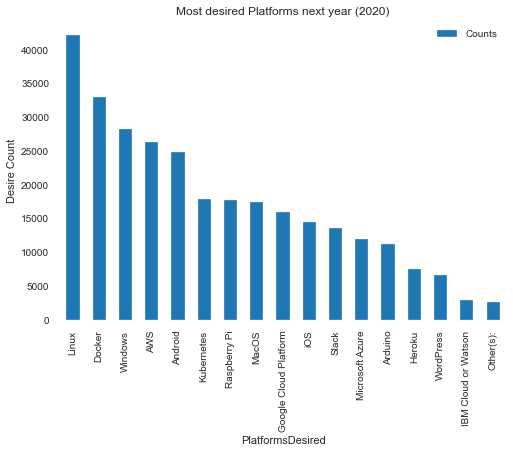

In [13]:
'''
1.) What are the most desired Platforms next year (2020)?
Plot
'''
plt.figure()
df_desired_platforms.plot(kind='bar')
plt.title('Most desired Platforms next year (2020)')
plt.ylabel('Desire Count')
plt.show()

In [14]:
'''
2.) What are the most desired Databases next year (2020)?
Data
'''
df_desired_databases=get_df_desired_x(df_2019,'DatabaseDesireNextYear','DatabaseDesired')
df_desired_databases

,Counts
DatabaseDesired,
PostgreSQL,26446
MySQL,25750
MongoDB,23667
Redis,17913
SQLite,17807
Microsoft SQL Server,16225
Elasticsearch,15440
Firebase,11921
MariaDB,9986


<Figure size 576x396 with 0 Axes>

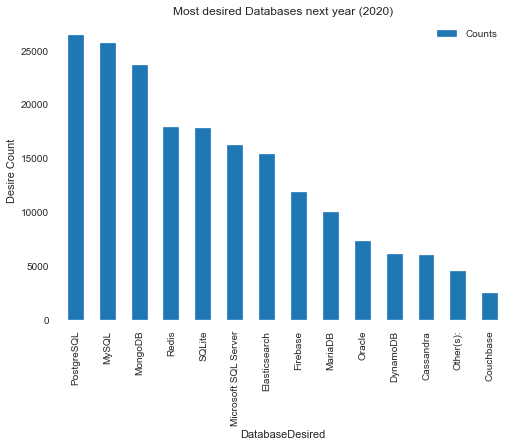

In [15]:
'''
2.) What are the most desired Databases next year (2020)?
Plot
'''
plt.figure()
df_desired_databases.plot(kind='bar')
plt.title('Most desired Databases next year (2020)')
plt.ylabel('Desire Count')
plt.show()

In [16]:
'''
3.) What are the most desired Programming Languages next year (2020)?
Data
'''
df_desired_languages=get_df_desired_x(df_2019,'LanguageDesireNextYear','LanguagesDesired')
df_desired_languages

,Counts
LanguagesDesired,
JavaScript,44739
Python,40006
HTML/CSS,36645
SQL,33566
TypeScript,23720
Java,23508
C#,22449
Bash/Shell/PowerShell,21303
Go,17060


<Figure size 576x396 with 0 Axes>

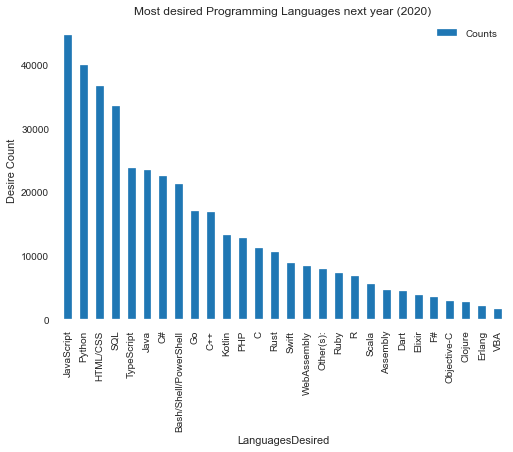

In [17]:
'''
3.) What are the most desired Programming Languages next year (2020)?
Plot
'''
plt.figure()
df_desired_languages.plot(kind='bar')
plt.title('Most desired Programming Languages next year (2020)')
plt.ylabel('Desire Count')
plt.show()

In [18]:
'''
4.) What are the most desired Web Frameworks next year (2020)?
Data
'''
df_desired_webframeworks=get_df_desired_x(df_2019,'WebFrameDesireNextYear','WebframeworksDesired')
df_desired_webframeworks

,Counts
WebframeworksDesired,
React.js,29531
Vue.js,19784
Angular/Angular.js,19622
jQuery,16918
ASP.NET,13495
Express,12092
Django,11358
Spring,9846
Flask,8163


<Figure size 576x396 with 0 Axes>

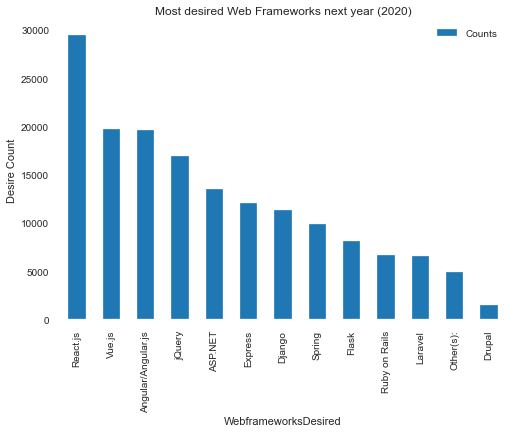

In [19]:
'''
4.) What are the most desired Web Frameworks next year (2020)?
Plot
'''
plt.figure()
df_desired_webframeworks.plot(kind='bar')
plt.title('Most desired Web Frameworks next year (2020)')
plt.ylabel('Desire Count')
plt.show()

In [20]:
'''
5.) What are the most used Dev environments currently (2019)?
Data
'''
df_most_used_dev_envs=get_df_desired_x(df_2019,'DevEnviron','DevEnvironUsed')
df_most_used_dev_envs


,Counts
DevEnvironUsed,
Visual Studio Code,44311
Visual Studio,27490
Notepad++,26621
IntelliJ,22166
Vim,22163
Sublime Text,20424
Android Studio,14787
Eclipse,12591
PyCharm,11724


<Figure size 576x396 with 0 Axes>

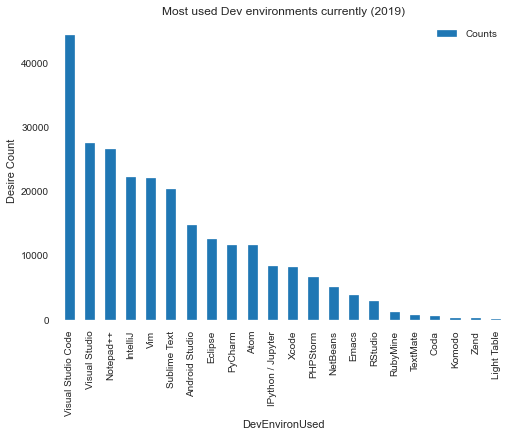

In [21]:
'''
5.) What are the most used Dev environments currently (2019)?
Plot
'''
plt.figure()
df_most_used_dev_envs.plot(kind='bar')
plt.title('Most used Dev environments currently (2019)')
plt.ylabel('Desire Count')
plt.show()

In [22]:
'''
We find the below answers
1.) What are the most desired Platforms next year (2020)?
    --Linux, Docker, Windows
2.) What are the most desired Databases next year (2020)?
    --PostgreSQL, MySQL, MongoDB
3.) What are the most desired Programming Languages next year (2020)?
    --Javascript, Python, HTML/CSS
4.) What are the most desired Web Frameworks next year (2020)?
    --React.js, VUE.js, Angular/Angular.js
5.) What are the most used Dev environments currently (2019)?
    --Visual Studio Code, Visual Studio, NotePad++
'''
pass